In [151]:
!pip install osmnx

  Using cached matplotlib-3.4.2-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [152]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [153]:
!pip install cmasher

In [154]:
import geopy as gp
from geopy.geocoders import Nominatim
import networkx as nx
import osmnx as ox
from geopy import Point
import matplotlib.pyplot as plt


In [212]:
def makeGraph(orig, dest):
  x_dist = abs(orig[0] - dest[0])
  y_dist = abs(orig[1] - dest[1])
  mid = ((orig[0]+dest[0])/2, (orig[1]+dest[1])/2)
  width = max(x_dist,y_dist)
  n = mid[1] + width
  s = mid[1] - width
  e = mid[0] + width
  w = mid[0] - width

  return n,s,e,w

def approx(orig_name, dest_name):
  import scipy 

  if type(orig_name) is tuple:
    orig = (orig_name[0], orig_name[1])
    dest = (dest_name[0], dest_name[1])

    n,s,e,w = makeGraph(orig,dest)

    G = ox.graph_from_bbox(e,w,n,s,network_type="all",retain_all=True)
    # G = ox.graph_from_point(orig, network_type='all', dist=4000,retain_all = True,simplify=False)
    # place = ["Daegu, Korea"]
    # G = ox.graph_from_place(place, retain_all=True, simplify = True, network_type='all')
    # G = ox.graph_from_address("대구")
    # approx_orig = get_nearest_edge_with_dist(G,orig_name)
    # approx_dest = get_nearest_edge_with_dist(G,dest_name)

    approx_orig,dist1 = ox.distance.nearest_nodes(G,orig[1],orig[0], return_dist=True)
    approx_dest,dist2 = ox.distance.nearest_nodes(G,dest[1],dest[0], return_dist=True)
    # print(G[approx_orig].longitude,dist2)

    route = ox.distance.shortest_path(G, approx_orig, approx_dest, weight='length')
    fig, ax = ox.plot_graph_route(G, route,route_color='b', route_linewidth=6, node_size=1, figsize=(20,20))
    
    return n,s,e,w
  else:
    print("wtf?")

In [156]:
def make_final(orig,dest):
  n,s,e,w = approx(orig,dest)
  plot_buildings(dest,n,s,e,w)


In [157]:
def find_nearest_daegu(orig):  
  fire_station_loc = [
      (35.86726098576162, 128.59962330475238), # 삼덕119안전센터 
      (35.86253878524152, 128.57523582676802), # 대구중부소방서
      (35.86724359696548, 128.59962866917002), # 대구북부소방서
      (35.882408601951184, 128.61060571142772), # 대현119안전센터
      (35.84910075180556, 128.59928952865747), # 봉덕119안전센터
      (35.876064186722346, 128.6251594402627), # 신천119안전센터
      (35.85660529420576, 128.62071113789983), # 수성119안전센터
      (35.881897287361035, 128.55433799793332), # 대구서부소방서
      (35.855439193080166, 128.58724126909758), # 명덕119안전센터
      (35.868918391726126, 128.58076926909774), # 대신119안전센터
      (35.85931300382355, 128.55526139793287), # 내당119안전센터
      (35.870672198090006, 128.64815299793287), # 무열로119안전센터
      (35.87519751253367, 128.60356174026276), # 북구의용소방대6지역대
      (35.86211254003367, 128.57512504990916), # 남산119안전센터
      (35.85533438874872, 128.65210376909747), # "만촌119안전센터"
      (35.87224679245571, 128.5976765402627),# "교동119지역대"
      (35.87835719379542, 128.6033403402627), # "칠성119지역대"
      (35.87798278693245, 128.59230896909793), # "칠성119안전센터" 
      (35.83965729047054, 128.54502799793232), # "본리119안전센터"
      (35.83549258652298, 128.62645199793224), # "황금119안전센터"
      (35.88057498840265, 128.57185688074617), # "비산119안전센터"
      (35.83732708187799, 128.57935780260067), # "대명119안전센터"
      (35.83346009055762, 128.5601581663955), # "성명119안전센터"
      (35.869056591756184, 128.5443219267681), # "이현119안전센터"
      (35.905997831792455, 128.61400006253965) # '산격119안전센터'
  ]

  min_dist = 100000
  min_dist_station = fire_station_loc[0]

  for station in fire_station_loc:
    new_dist = ox.distance.euclidean_dist_vec(station[1],station[0],orig[1],orig[0])
    if min_dist > new_dist:
      min_dist_station = station
      min_dist = new_dist
  return min_dist_station

(35.87798278693245, 128.59230896909793)


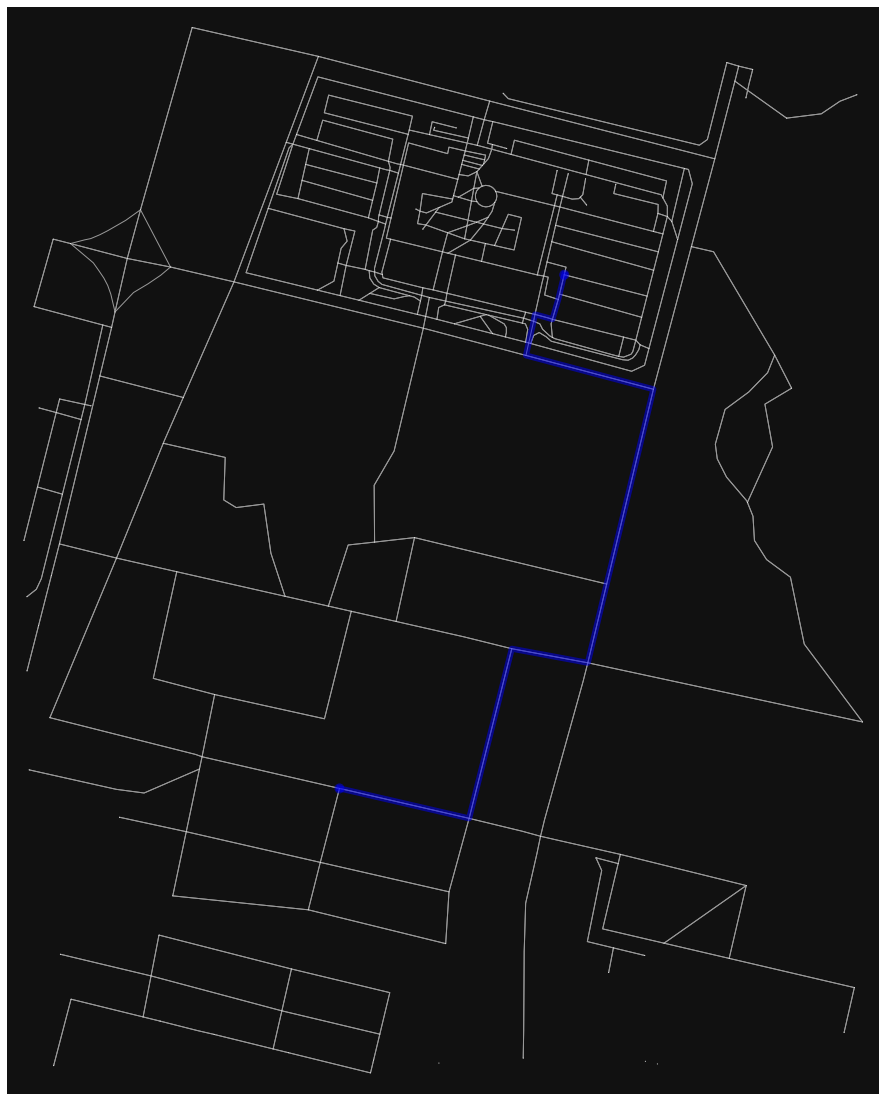

128.59922031534177 128.58889303281495 35.88572824882757 35.87540096630074


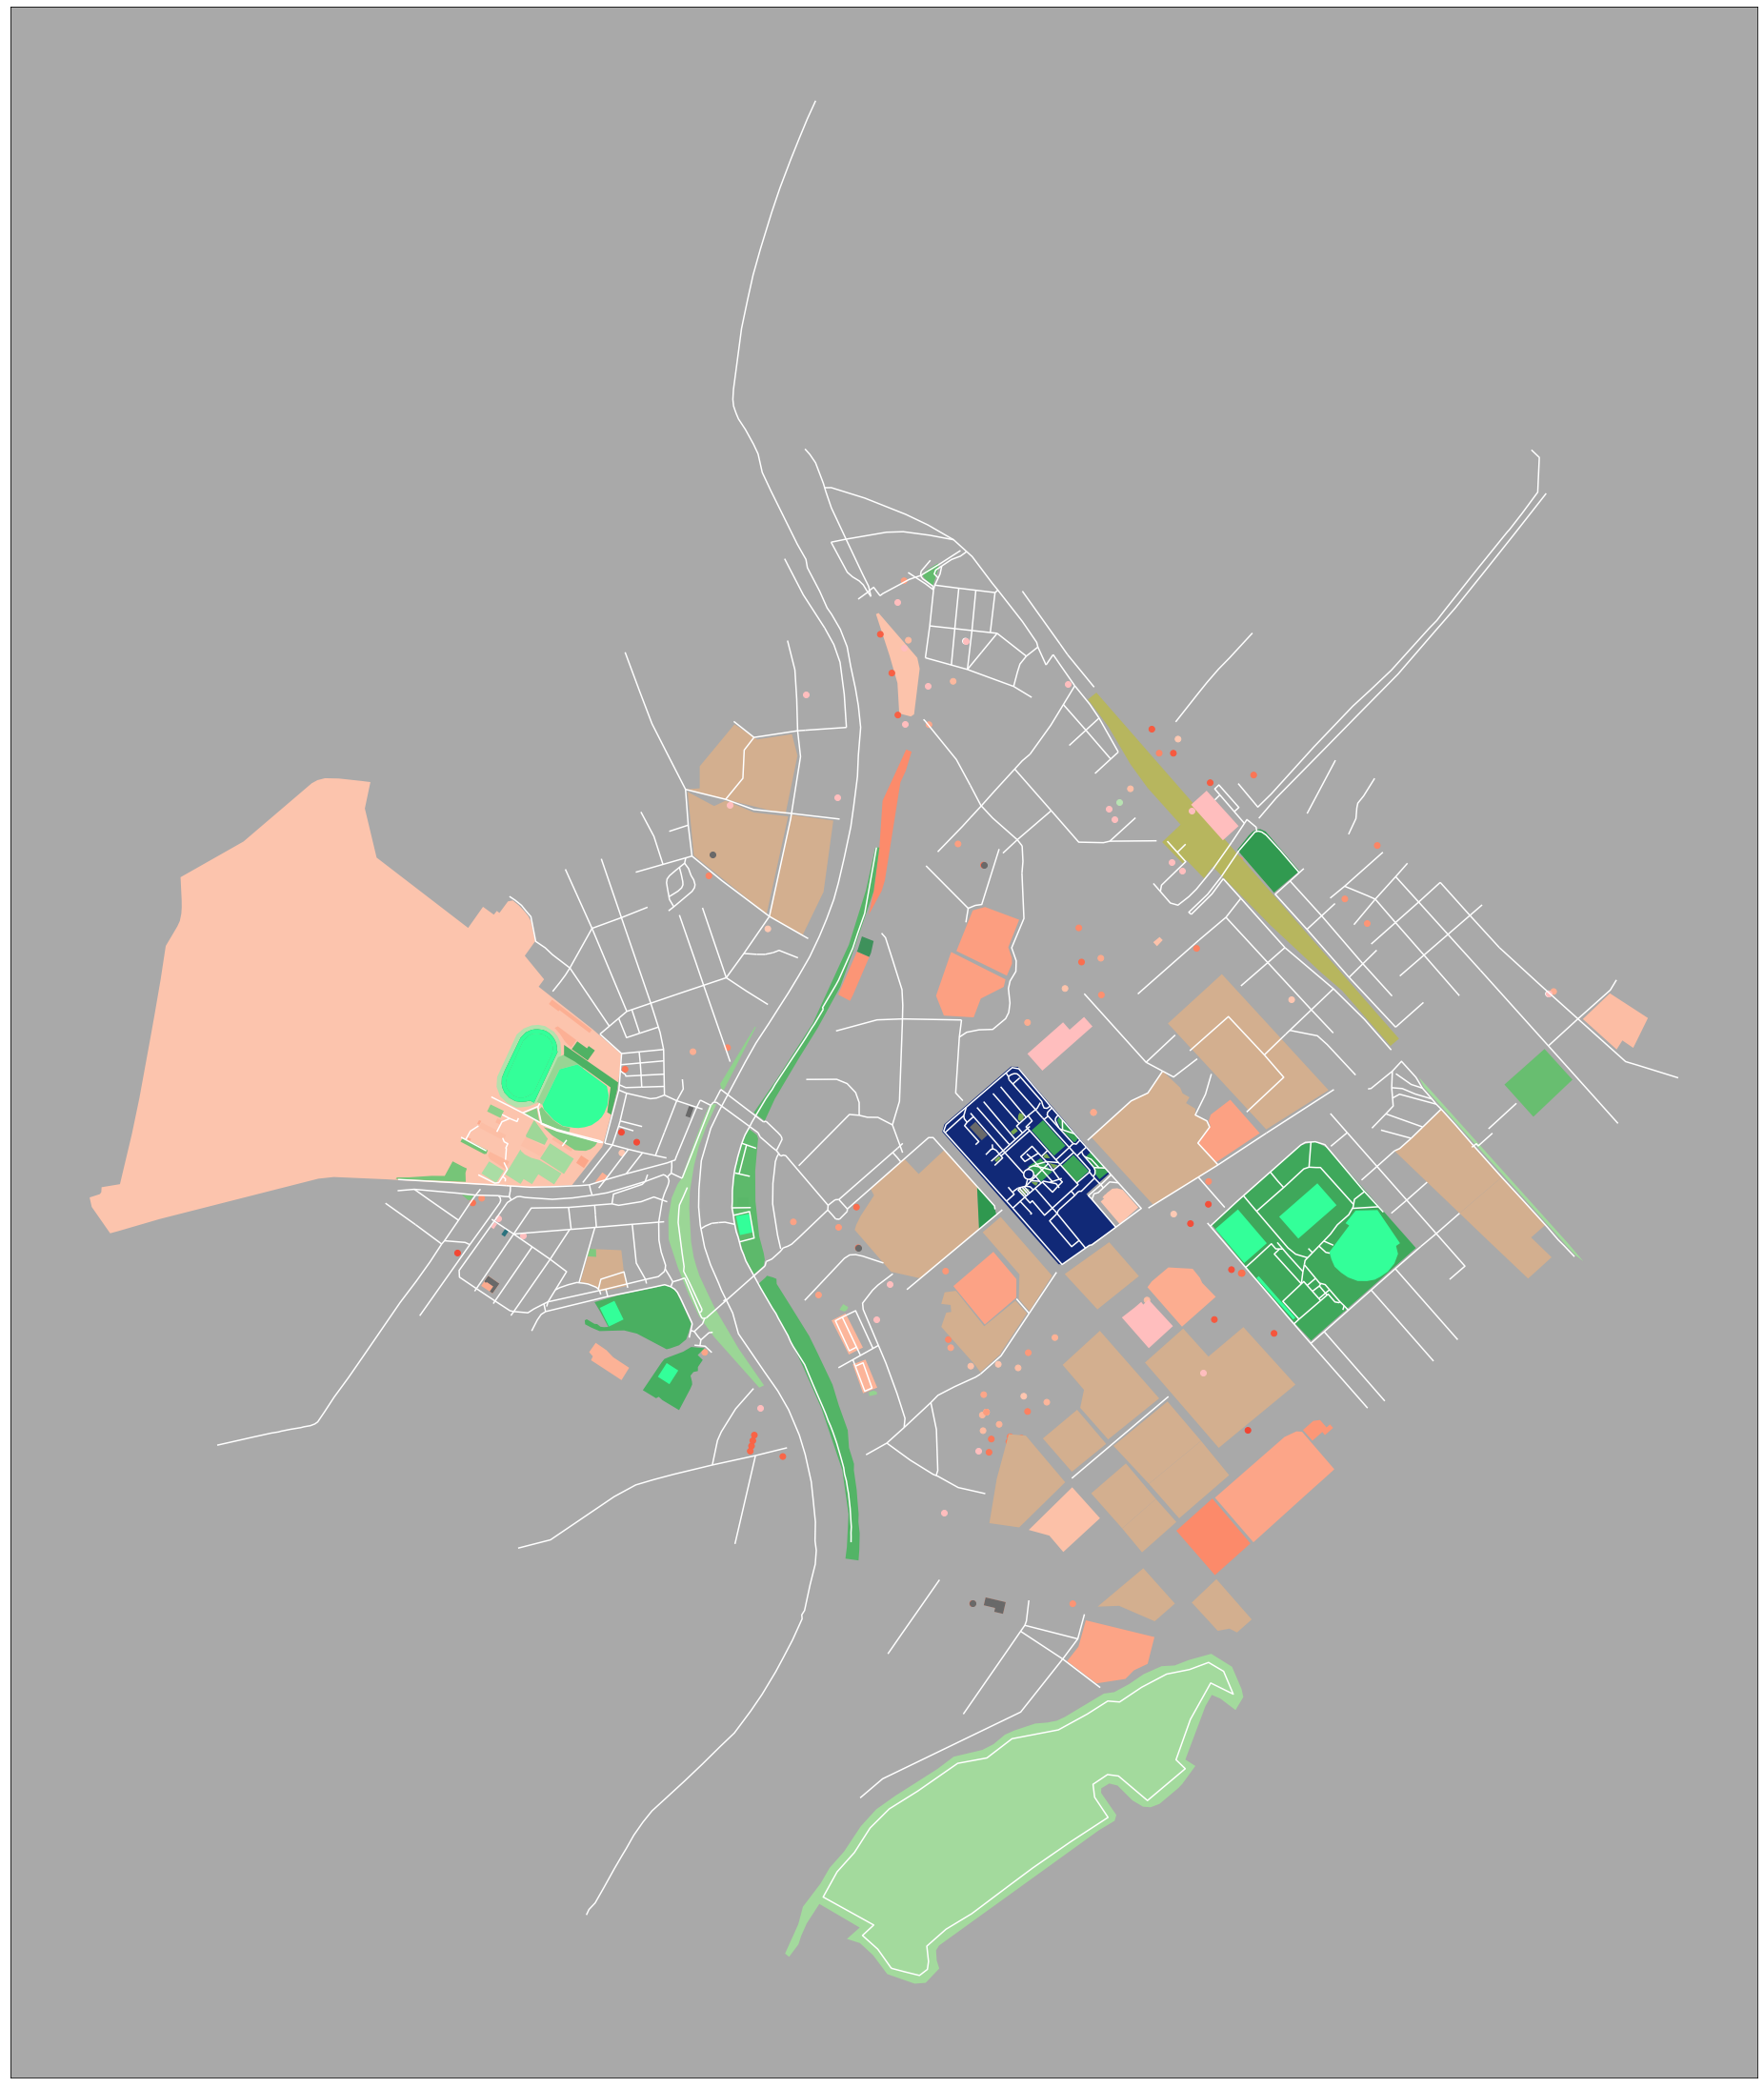

In [199]:
knu = (35.889506440002044, 128.6130623093732) # 대구광역시 북구 산격동 대학로 80
megabox_daegu = (35.88526347527548, 128.5895286736175) # 대구광역시 북구 칠성동 침산로 93
kwak = (35.87074564700752, 128.58868517110145) # 대구광역시 중구 성내2동 국채보상로 531
daegu_station = (35.87603675777349, 128.59601470971617) # 대구광역시 칠성동
mb_house = (35.87808302232432, 128.61735546048672) # 대구광역시 동구 신암동 181-1
global_plaza = (35.89199093658446, 128.61113273604283) # 대구광역시 북구 복현1동 대학로
changjo_danji = (35.883146428195865, 128.5958043790588) # 대구광역시 북구 호암로 51 
 
print(find_nearest_daegu(changjo_danji))

# approx(find_nearest_daegu(knu),knu)

make_final(find_nearest_daegu(changjo_danji),changjo_danji)

In [203]:
def find_nearest_bangalore(orig):
    fire_station_loc = [
      (12.980319867508092, 77.54833901465807), # Rajajinagar Fire Station
      (12.83240497307468, 77.66232216899836), # Electronic City Fire Station
      (13.011546486523939, 77.64598297102619), # Banaswadi Fire Station
      (12.970952291487142, 77.60739052754832), # South fire station
      (12.91681864265092, 77.67380637102619), # Sarjapur Road Fire Station
      (12.986568282315611, 77.61822682869696), # Karnataka State Fire and Emergency Services
      # (12.93363221678014, 77.6007307440385), # Jayanagara Fire Station
      (12.92236508576671, 77.56107351335544), # Banashankari Fire Station
      (12.931663513456048, 77.60000618082472), # Karnataka Fire Service
      (12.980546190650223, 77.58021694219083), # Fire Station Control Room (101)
      (13.125161451440832, 77.60096038452006), # Yelahanka Fire Station
      (12.998301198972733, 77.70270889986158), # mahadevapura fire station
      (12.859136701213195, 77.5633331710262), # Anjanapura Fire Station
      (13.065947648928576, 77.77898995753235), # Hoskote Fire station
      (13.028023760494579, 77.51965732626326) # Fire station peenya
    ]
    min_dist = 100000
    min_dist_station = fire_station_loc[0]

    for station in fire_station_loc:
      new_dist = ox.distance.euclidean_dist_vec(station[1],station[0],orig[1],orig[0])
      if min_dist > new_dist:
        min_dist_station = station
        min_dist = new_dist
    return min_dist_station

In [210]:
def plot_buildings(dest,n,s,e,w):
  import cmasher as cmr

  print(n,s,e,w)
  
  tags = {
      'highway':['residential','footway'],
      'landuse':True,
      'building':True, 
      'amenity':['fuel','bar','cafe','food_court','pub','restaurant', 'biergarten','fast_food',
                 'ice_cream','driving_school','library','bicycle_rental','bicycle_repair_station',
                 'car_rental','car_wash','charging_station','motorcycle_parking','parking',
                 'taxi','clinic','pharmacy','arts_centre','casino','nightclub','public_bookcase',
                 'stripclub','studio','swingerclub','theatre','internet_cafe','baking_oven',
                 'recycling','sanitary_dump_station','waste_transfer_station',
                 'bbq','townhall','prison'],
      'amenity':True,
      # 'barrier':True,
      'craft':True,
      # 'boundary':True,
      # 'craft':True,
      'emergency':True,
      # 'historic':True,
      'leisure':True,
      'shop':True,
      # 'sport':True,
      'office':True,
  }

  # MK = ox.geometries_from_bbox(n,s,e,w, tags=tags)
  MK = ox.geometries_from_point(dest,dist=1000,tags=tags)
  

  # Presentation code
  MK.to_crs(epsg=27700, inplace=True)



  fig,ax = plt.subplots(figsize=(40,40))
  # route = ox.distance.shortest_path(G, approx_orig, approx_dest, weight='length')
  # fig, ax = ox.plot_graph_route(G, route,route_color='r', route_linewidth=14, node_size=1, figsize=(20,20))
  MK[MK['landuse'].notna()].plot(ax=ax, column='landuse', cmap = cmr.get_sub_cmap('gist_earth', 0.1, 1.0))
  MK[MK['highway'].notna()].plot(ax=ax, color='white')
  # MK[MK['amenity'].notna()].plot(ax=ax, color='dimgrey',zorder=-1, legend=True)
  MK[MK['amenity'].notna()].plot(ax=ax, cmap = cmr.get_sub_cmap('Reds', 0.2, 0.6),zorder=-1, legend=True)
  # MK[MK['barrier'].notna()].plot(ax=ax, color='black', legend=True)
  # MK[MK['craft'].notna()].plot(ax=ax, color='dimgrey', legend=True)
  # MK[MK['emergency'].notna()].plot(ax=ax, color='red', legend=True)
  # MK[MK['historic'].notna()].plot(ax=ax, color='purple', legend=True)
  MK[MK['leisure'].notna()].plot(ax=ax,cmap = cmr.get_sub_cmap('Greens', 0.3, 0.7),zorder=1, legend=True)
  MK[MK['shop'].notna()].plot(ax=ax, color='#ffbebe', legend=True)
  # MK[MK['sport'].notna()].plot(ax=ax, color='#33ff99', legend=True)
  # MK[MK['boundary'].notna()].plot(ax=ax, color='dimgrey',zorder=-2, legend=True)
  MK[MK['office'].notna()].plot(ax=ax, color='dimgrey', legend=True)
  # ox.plot_graph_routes(G, list(routes), route_colors='y',route_linewidth=4, node_size=0.5, figsize=(25,25)).plot(ax=ax)
  ax.set_facecolor('darkgrey')
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)

(12.91681864265092, 77.67380637102619)


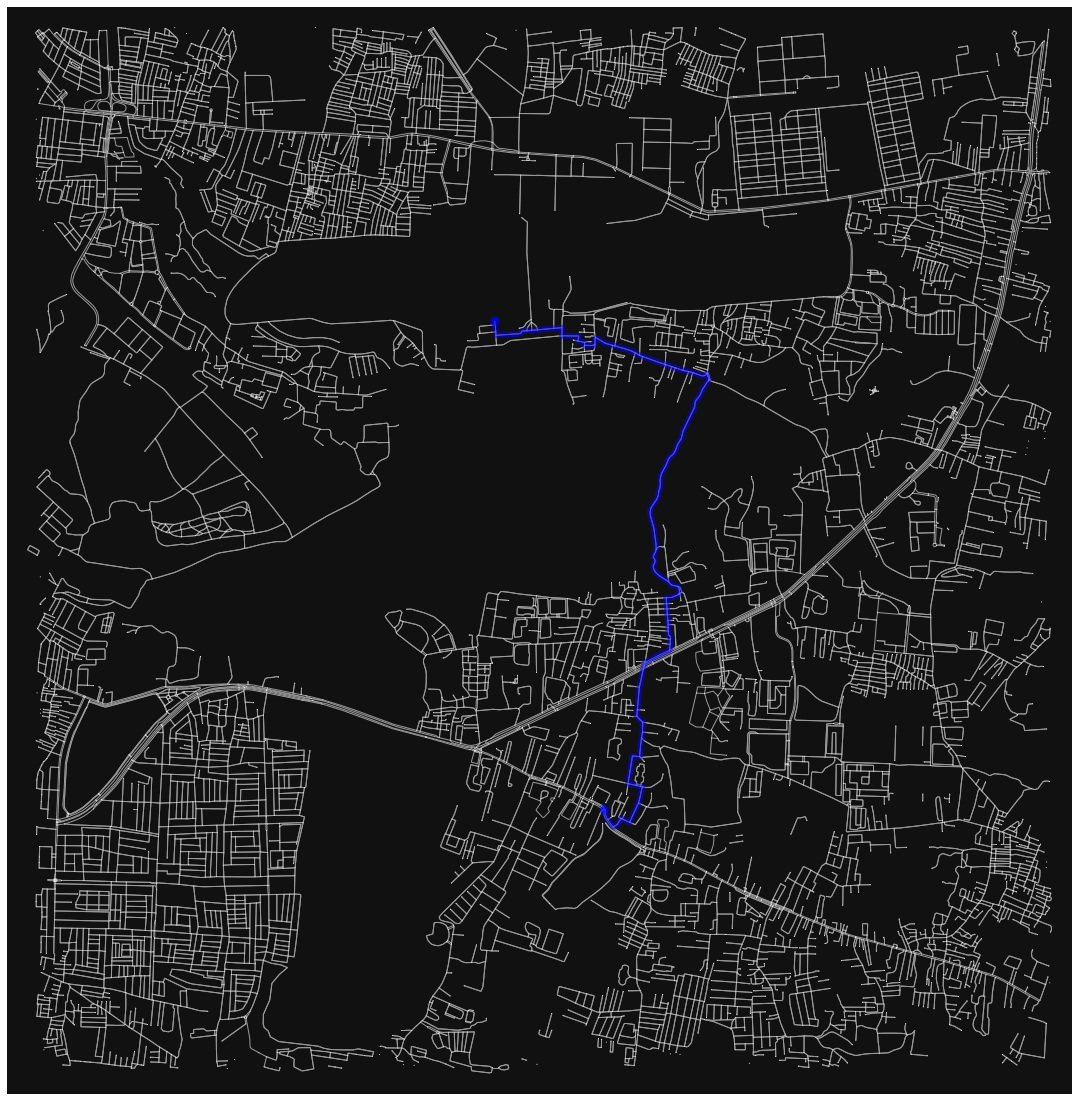

77.70247147792918 77.6368530808528 12.966032440458214 12.900414043381822


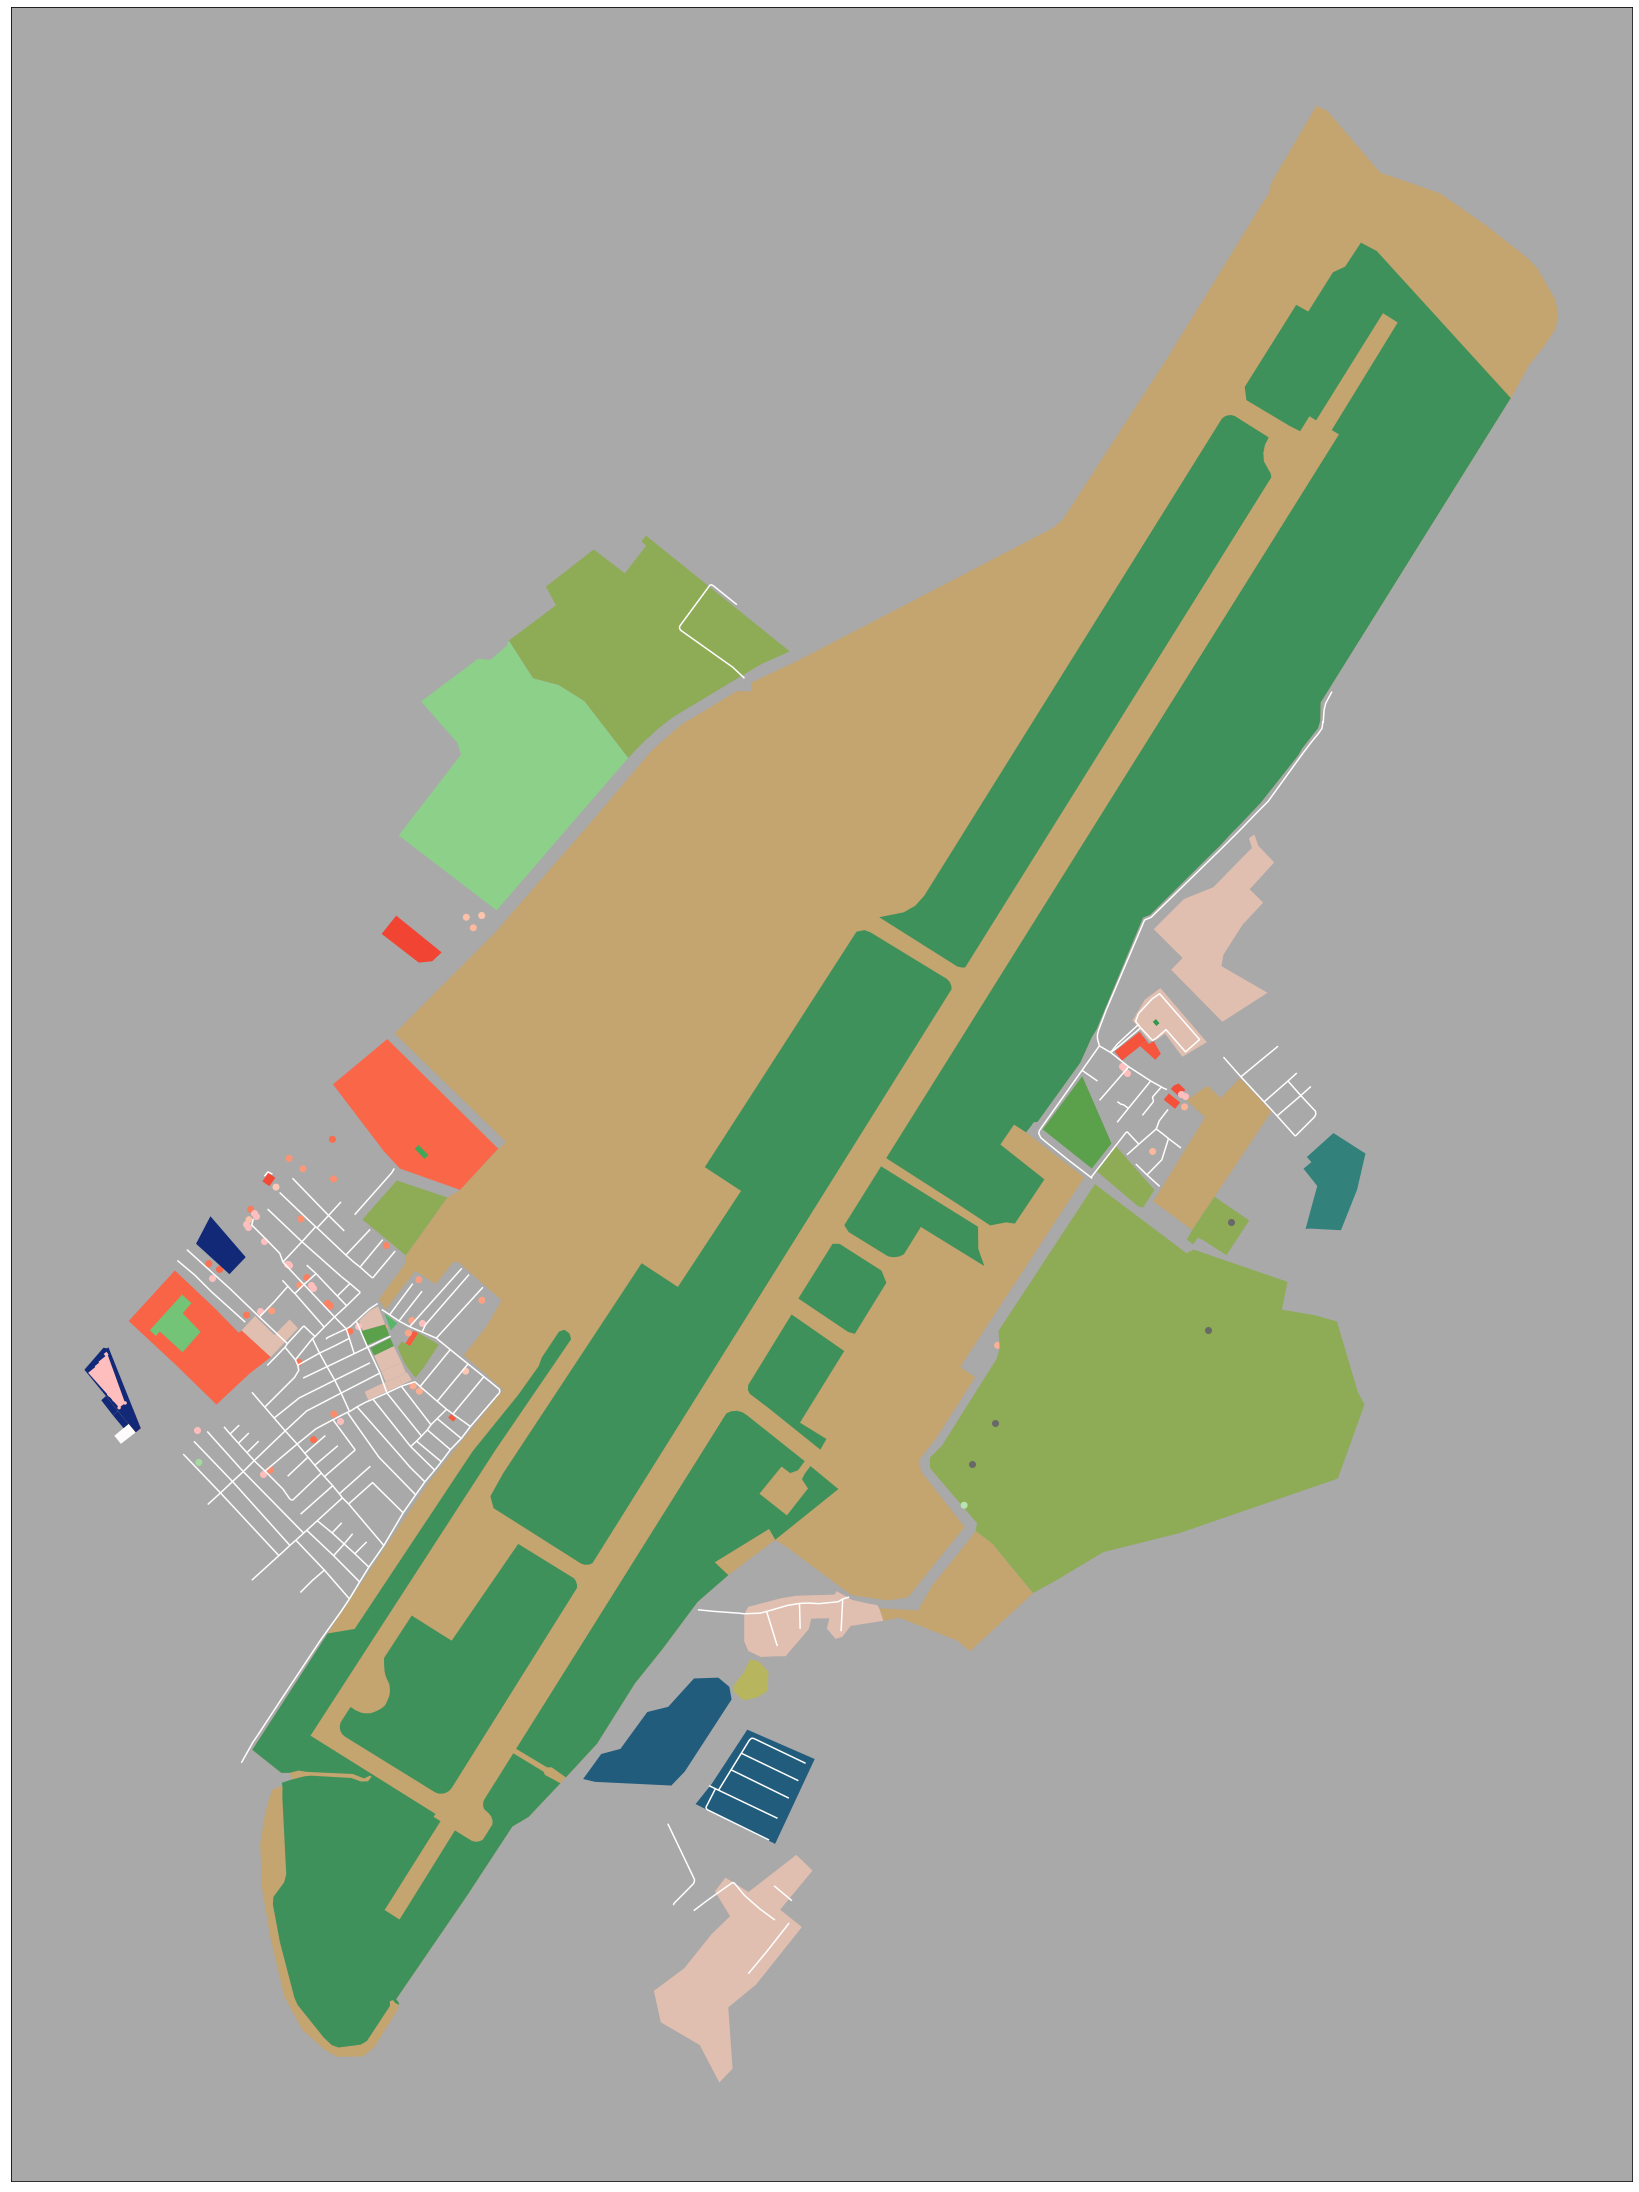

In [213]:
cu_library = (12.933482180146514, 77.6065467376655) # Hosur Rd, Bhavani Nagar, S.G. Palya, Bengaluru, Karnataka 560029, India
lg_soft_india = (12.936333004919122, 77.69448398230736) # Embassy Tech Square ಎಂಬೆಸಿ ಟೆಕ್ ಸ್ಕ್ವೇರ್, Cessna Business Park Internal Rd, Kaverappa Layout, Kadubeesanahalli, Marathahalli, Bengaluru, Karnataka 560103, India
vasavi_hospital = (12.903094760353206, 77.56061601839158) #15, 1st Stage, Opp. to 15E Bus Stop, 70th Cross Rd, Kumaraswamy Layout, Bengaluru, Karnataka 560078, India
k = (12.949627841189116, 77.66551818775578) # WMX8+W6C, HAL Airport Area, HAL, Bengaluru, Karnataka 560017, India


print(find_nearest_bangalore(k))

make_final(find_nearest_bangalore(k),k)